In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
earthquake = pd.read_csv("earthquake.csv")
earthquake.info()
earthquake.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266681 entries, 0 to 266680
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             266681 non-null  object 
 1   latitude         266681 non-null  float64
 2   longitude        266681 non-null  float64
 3   depth            265958 non-null  float64
 4   mag              266681 non-null  float64
 5   magType          266680 non-null  object 
 6   nst              88092 non-null   float64
 7   gap              135130 non-null  float64
 8   dmin             61881 non-null   float64
 9   rms              225541 non-null  float64
 10  net              266681 non-null  object 
 11  id               266681 non-null  object 
 12  updated          266681 non-null  object 
 13  place            266615 non-null  object 
 14  type             266681 non-null  object 
 15  horizontalError  54781 non-null   float64
 16  depthError       121464 non-null  floa

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1949-12-29T03:03:56.000Z,17.429,121.485,15.0,7.1,mw,NaN,NaN,NaN,NaN,...,2020-07-10T09:08:44.842Z,"5 km SSE of Laya, Philippines",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
1,1949-12-27T23:57:15.000Z,-60.013,-21.590,10.0,6.7,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:45.000Z,east of the South Sandwich Islands,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
2,1949-12-26T06:23:58.000Z,-15.883,-179.532,15.0,6.9,mw,NaN,NaN,NaN,NaN,...,2020-07-10T09:08:29.453Z,"132 km ENE of Labasa, Fiji",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
3,1949-12-25T23:24:54.000Z,36.713,139.807,10.0,6.3,mw,NaN,NaN,NaN,NaN,...,2020-07-10T09:08:09.711Z,"11 km E of Imaichi, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
4,1949-12-25T23:17:33.000Z,36.702,139.717,10.0,6.3,mw,NaN,NaN,NaN,NaN,...,2020-07-10T09:07:50.908Z,"3 km ESE of Imaichi, Japan",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem


In [3]:
earthquake_pre = earthquake[["time", "latitude", "longitude", "depth", "mag", "place"]]
earthquake_pre.dropna(inplace=True)
earthquake_pre.info()
earthquake_pre.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265892 entries, 0 to 265891
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       265892 non-null  object 
 1   latitude   265892 non-null  float64
 2   longitude  265892 non-null  float64
 3   depth      265892 non-null  float64
 4   mag        265892 non-null  float64
 5   place      265892 non-null  object 
dtypes: float64(4), object(2)
memory usage: 12.2+ MB


C:\Users\YJ\anaconda3\envs\pybook\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,time,latitude,longitude,depth,mag,place
0,1949-12-29T03:03:56.000Z,17.429,121.485,15.0,7.1,"5 km SSE of Laya, Philippines"
1,1949-12-27T23:57:15.000Z,-60.013,-21.590,10.0,6.7,east of the South Sandwich Islands
2,1949-12-26T06:23:58.000Z,-15.883,-179.532,15.0,6.9,"132 km ENE of Labasa, Fiji"
3,1949-12-25T23:24:54.000Z,36.713,139.807,10.0,6.3,"11 km E of Imaichi, Japan"
4,1949-12-25T23:17:33.000Z,36.702,139.717,10.0,6.3,"3 km ESE of Imaichi, Japan"


In [4]:
country = pd.read_csv("country-by-continent.csv")
country.info()
country.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    244 non-null    object
 1   continent  244 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,American Samoa,Oceania
4,Andorra,Europe


In [15]:
earthquake_pre["time"] = pd.to_datetime(earthquake_pre["time"])
earthquake_pre.sort_values("time", inplace=True)
earthquake_pre.reset_index(inplace=True)
del earthquake_pre["index"]
earthquake_pre.head()

C:\Users\YJ\AppData\Local\Temp/ipykernel_7004/1900966079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_pre["time"] = pd.to_datetime(earthquake_pre["time"])
C:\Users\YJ\anaconda3\envs\pybook\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,time,latitude,longitude,depth,mag,place,country,continent
0,1910-01-08 14:49:25+00:00,34.043,121.976,20.0,6.50,"161 km E of Hede, China",China,Asia
1,1910-04-12 00:22:24+00:00,25.911,123.973,235.0,8.10,northeast of Taiwan,NaN,NaN
2,1910-05-13 07:58:06+00:00,57.000,-160.000,100.0,6.75,"83 km W of Port Heiden, Alaska",NaN,NaN
3,1910-06-16 06:30:43+00:00,-19.572,169.438,100.0,7.80,"16 km ESE of Isangel, Vanuatu",Vanuatu,Oceania
4,1910-11-09 06:02:00+00:00,-16.289,166.904,20.0,7.30,"58 km WSW of Norsup, Vanuatu",Vanuatu,Oceania


In [23]:
display(earthquake_pre.sort_values("mag"))
earthquake_pre = earthquake_pre[earthquake_pre["mag"] >= 4.5]

,time,latitude,longitude,depth,mag,place,country,continent
110977,1998-12-18 05:58:15.160000+00:00,54.8570,162.7280,33.00,4.5,"153 km S of Ust’-Kamchatsk Staryy, Russia",NaN,NaN
39028,1981-12-25 12:40:38.890000+00:00,-30.4460,-177.5100,33.00,4.5,"Kermadec Islands, New Zealand",New Zealand,Oceania
83513,1992-09-11 06:48:50.150000+00:00,12.7310,-88.8510,33.00,4.5,"69 km SSW of Puerto El Triunfo, El Salvador",El Salvador,North America
144862,2005-05-14 22:28:16.530000+00:00,-3.7700,151.2230,35.00,4.5,"114 km WNW of Rabaul, Papua New Guinea",Guinea,Africa
210465,2014-06-01 09:14:01.170000+00:00,28.4383,142.8752,26.93,4.5,"Bonin Islands, Japan region",Japan,Asia
...,...,...,...,...,...,...,...,...
2539,1952-11-04 16:58:30+00:00,52.6230,159.7790,21.60,9.0,"89 km ESE of Petropavlovsk-Kamchatsky, Russia",NaN,NaN
140576,2004-12-26 00:58:53.450000+00:00,3.2950,95.9820,30.00,9.1,2004 Sumatra - Andaman Islands Earthquake,NaN,NaN
184304,2011-03-11 05:46:24.120000+00:00,38.2970,142.3730,29.00,9.1,"2011 Great Tohoku Earthquake, Japan",Japan,Asia
5963,1964-03-28 03:36:16+00:00,60.9080,-147.3390,25.00,9.2,"1964 Prince William Sound Earthquake, Alaska",NaN,NaN


In [5]:
earthquake_pre["country"] = [np.nan for i in range(len(earthquake_pre))]
earthquake_pre["continent"] = earthquake_pre["country"]
display(earthquake_pre.head())
print("country:", country["country"][0],"place:", earthquake_pre["place"][0])
for i in range(len(earthquake_pre)):
    for j in range(len(country)):
        if country["country"][j] in earthquake_pre["place"][i]:
            earthquake_pre["country"][i] = country["country"][j]
            earthquake_pre["continent"][i] = country["continent"][j]
            break
earthquake_pre.head()

C:\Users\YJ\AppData\Local\Temp/ipykernel_7004/2600465823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_pre["country"] = [np.nan for i in range(len(earthquake_pre))]
C:\Users\YJ\AppData\Local\Temp/ipykernel_7004/2600465823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_pre["continent"] = earthquake_pre["country"]


,time,latitude,longitude,depth,mag,place,country,continent
0,1949-12-29T03:03:56.000Z,17.429,121.485,15.0,7.1,"5 km SSE of Laya, Philippines",NaN,NaN
1,1949-12-27T23:57:15.000Z,-60.013,-21.590,10.0,6.7,east of the South Sandwich Islands,NaN,NaN
2,1949-12-26T06:23:58.000Z,-15.883,-179.532,15.0,6.9,"132 km ENE of Labasa, Fiji",NaN,NaN
3,1949-12-25T23:24:54.000Z,36.713,139.807,10.0,6.3,"11 km E of Imaichi, Japan",NaN,NaN
4,1949-12-25T23:17:33.000Z,36.702,139.717,10.0,6.3,"3 km ESE of Imaichi, Japan",NaN,NaN


C:\Users\YJ\AppData\Local\Temp/ipykernel_7004/2600465823.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_pre["country"][i] = country["country"][j]
C:\Users\YJ\anaconda3\envs\pybook\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\YJ\AppData\Local\Temp/ipykernel_7004/2600465823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

country: Afghanistan place: 5 km SSE of Laya, Philippines


,time,latitude,longitude,depth,mag,place,country,continent
0,1949-12-29T03:03:56.000Z,17.429,121.485,15.0,7.1,"5 km SSE of Laya, Philippines",Philippines,Asia
1,1949-12-27T23:57:15.000Z,-60.013,-21.590,10.0,6.7,east of the South Sandwich Islands,NaN,NaN
2,1949-12-26T06:23:58.000Z,-15.883,-179.532,15.0,6.9,"132 km ENE of Labasa, Fiji",NaN,NaN
3,1949-12-25T23:24:54.000Z,36.713,139.807,10.0,6.3,"11 km E of Imaichi, Japan",Japan,Asia
4,1949-12-25T23:17:33.000Z,36.702,139.717,10.0,6.3,"3 km ESE of Imaichi, Japan",Japan,Asia


In [7]:
earthquake_pre.info()
earthquake_pre.to_csv("earthquake_pre.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265892 entries, 0 to 265891
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       265892 non-null  object 
 1   latitude   265892 non-null  float64
 2   longitude  265892 non-null  float64
 3   depth      265892 non-null  float64
 4   mag        265892 non-null  float64
 5   place      265892 non-null  object 
 6   country    194590 non-null  object 
 7   continent  194590 non-null  object 
dtypes: float64(4), object(4)
memory usage: 16.2+ MB


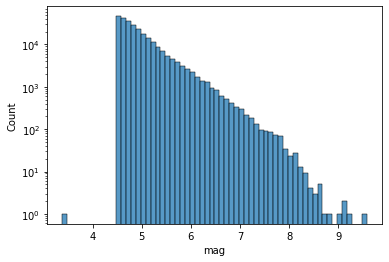

In [8]:
# earthquake count by magnitude
sns.histplot(data = earthquake_pre, x="mag", binwidth=0.1).set_yscale("log")

C:\Users\YJ\AppData\Local\Temp/ipykernel_7004/4136234746.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(data = earthquake_pre, x="continent").set_xticklabels(["AS", "SA", "OC", "NA", "AF", "EU", "AN"])


[Text(0, 0, 'AS'),
 Text(1, 0, 'SA'),
 Text(2, 0, 'OC'),
 Text(3, 0, 'NA'),
 Text(4, 0, 'AF'),
 Text(5, 0, 'EU'),
 Text(6, 0, 'AN')]

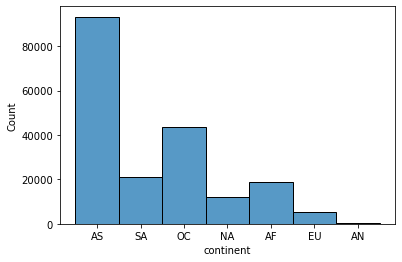

In [9]:
# earthquake count by continent
sns.histplot(data = earthquake_pre, x="continent").set_xticklabels(["AS", "SA", "OC", "NA", "AF", "EU", "AN"])

In [25]:
# earthquake that has largest magnitude in 1910~2021
earthquake_pre.sort_values("mag").head()

,time,latitude,longitude,depth,mag,place,country,continent
110977,1998-12-18 05:58:15.160000+00:00,54.8570,162.7280,33.00,4.5,"153 km S of Ust’-Kamchatsk Staryy, Russia",NaN,NaN
39028,1981-12-25 12:40:38.890000+00:00,-30.4460,-177.5100,33.00,4.5,"Kermadec Islands, New Zealand",New Zealand,Oceania
83513,1992-09-11 06:48:50.150000+00:00,12.7310,-88.8510,33.00,4.5,"69 km SSW of Puerto El Triunfo, El Salvador",El Salvador,North America
144862,2005-05-14 22:28:16.530000+00:00,-3.7700,151.2230,35.00,4.5,"114 km WNW of Rabaul, Papua New Guinea",Guinea,Africa
210465,2014-06-01 09:14:01.170000+00:00,28.4383,142.8752,26.93,4.5,"Bonin Islands, Japan region",Japan,Asia


In [57]:
# find NaN country's place
nancountrys = earthquake_pre[earthquake_pre["country"].isna()]["place"].to_frame()
display(nancountrys)
# find NaN country's country(using comma)
nancountrys["place"].apply(lambda x:x.split(",")[-1]).reset_index().groupby("place").count().sort_values("index", ascending=False).head(20)


,place
1,northeast of Taiwan
2,"83 km W of Port Heiden, Alaska"
16,"20 km E of Moose Pass, Alaska"
20,"47 km WNW of Tatitlek, Alaska"
25,"33 km WSW of Karluk, Alaska"
...,...
265873,"24 km S of Yuzhno-Kurilsk, Russia"
265876,South Atlantic Ocean
265879,central Mid-Atlantic Ridge
265881,South Sandwich Islands region


,index
place,
Russia,10757
Alaska,8753
South Sandwich Islands region,5321
Kermadec Islands region,3848
Fiji,3049
Fiji region,2836
Timor Leste,2722
south of the Kermadec Islands,2607
northern Mid-Atlantic Ridge,2049
